In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df=pd.read_csv('/content/data_cardiovascular_risk.csv')

In [87]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [88]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [90]:
df.shape

(3390, 17)

In [91]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [92]:
# we will drop the id column as its not important for the model
df.drop('id',axis=1,inplace=True)

In [93]:
df['education'].fillna(method='bfill',inplace=True)
df['BPMeds'].fillna(method='pad',inplace=True)

In [94]:
# we will change these categorical values to numeric form
df['sex']=df['sex'].map({'F':0,'M':1})
df['is_smoking']=df['is_smoking'].map({'YES':1,'NO':0})

In [95]:
df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [96]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=6)
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [97]:
df_imputed['education']=df_imputed['education'].map({1: 'Higher_Secondary', 2: 'Graduation',3: 'Post_Graduation',4:'PHD'})
df_imputed['sex']=df_imputed['sex'].map({1: 'MALE', 0: 'FEMALE'})
df_imputed['is_smoking']=df_imputed['is_smoking'].map({0: 'NO', 1: 'YES'})
df_imputed['BPMeds']=df_imputed['BPMeds'].map({0: 'NO', 1: 'YES'})
df_imputed['prevalentStroke']=df_imputed['prevalentStroke'].map({0: 'NO', 1: 'YES'})
df_imputed['prevalentHyp']=df_imputed['prevalentHyp'].map({0: 'NO', 1: 'YES'})
df_imputed['diabetes']=df_imputed['diabetes'].map({0: 'NO', 1: 'YES'})

In [98]:
cat_cols=[]
for i in df_imputed.columns:
    if df_imputed[i].nunique()<11:
        cat_cols.append(i)


continuous_cols=list(df_imputed.drop(cat_cols,axis=1).columns)
print(cat_cols)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


In [99]:
Y=df_imputed['TenYearCHD']
X=df_imputed.drop('TenYearCHD',axis=1)
X=pd.get_dummies(X)

In [100]:
for col in cat_cols:
    print(df_imputed[col].value_counts(normalize=True) * 100)


education
Higher_Secondary    42.241888
Graduation          29.911504
Post_Graduation     16.607670
PHD                 11.238938
Name: proportion, dtype: float64
sex
FEMALE    56.725664
MALE      43.274336
Name: proportion, dtype: float64
is_smoking
NO     50.235988
YES    49.764012
Name: proportion, dtype: float64
BPMeds
NO     97.050147
YES     2.949853
Name: proportion, dtype: float64
prevalentStroke
NO     99.351032
YES     0.648968
Name: proportion, dtype: float64
prevalentHyp
NO     68.466077
YES    31.533923
Name: proportion, dtype: float64
diabetes
NO     97.433628
YES     2.566372
Name: proportion, dtype: float64
TenYearCHD
0.0    84.926254
1.0    15.073746
Name: proportion, dtype: float64


In [101]:
df_imputed[continuous_cols].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.00000,3390.000000,3390.000000
mean,49.542183,9.080088,237.087856,132.60118,82.883038,25.79601,75.980924,82.028269
std,8.592878,11.849990,45.036580,22.29203,12.023581,4.10867,11.971983,23.292059
min,32.000000,0.000000,107.000000,83.50000,48.000000,15.96000,45.000000,40.000000
25%,42.000000,0.000000,206.000000,117.00000,74.500000,23.03000,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.50000,82.000000,25.38000,75.000000,78.000000
75%,56.000000,20.000000,264.000000,144.00000,90.000000,28.04000,83.000000,86.000000
max,70.000000,70.000000,696.000000,295.00000,142.500000,56.80000,143.000000,394.000000


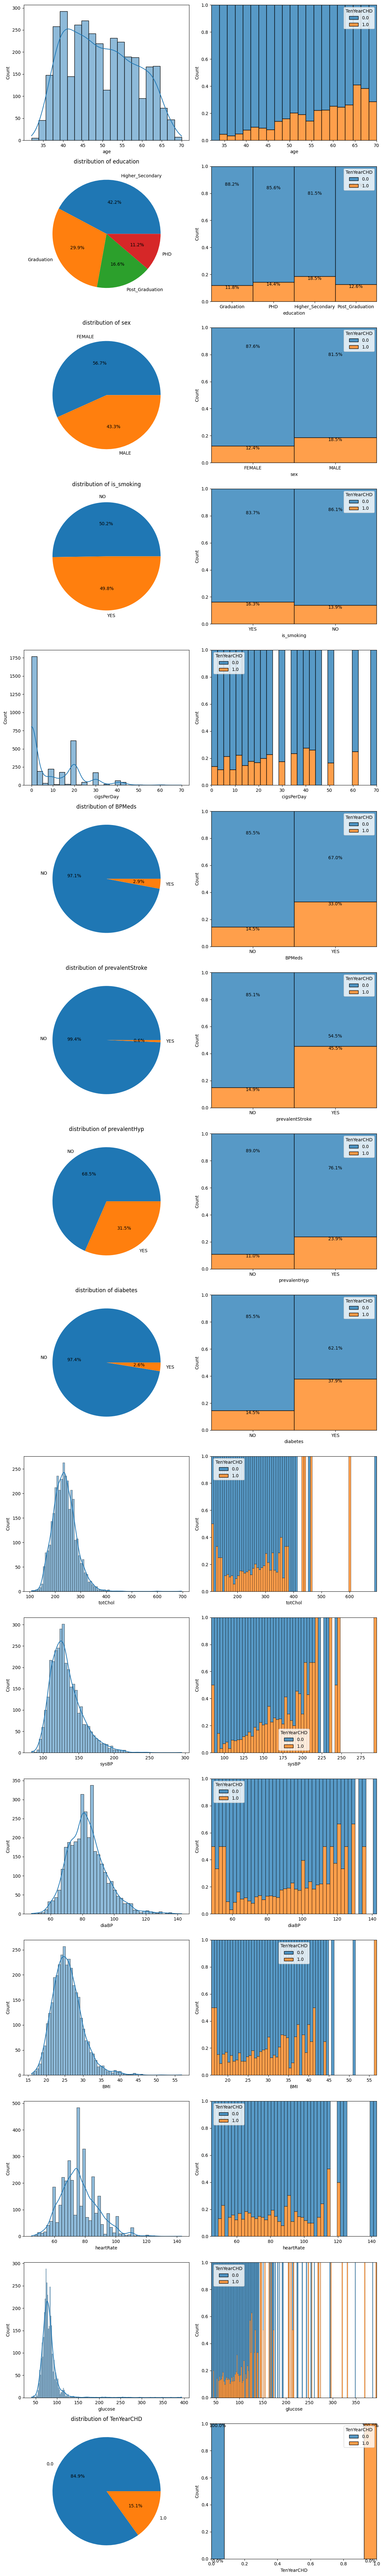

In [102]:
fig, axs = plt.subplots(len(df_imputed.columns), 2, figsize=(12, 5 * len(df_imputed.columns)))

for i,col in enumerate(df_imputed.columns):
  if col in cat_cols:
    axs[i,0].pie(df_imputed[col].value_counts(),labels=df_imputed[col].value_counts().index, autopct='%1.1f%%')
    axs[i,0].set_title(f'distribution of {col}')
  elif col in continuous_cols:
    sns.histplot(df_imputed[col],ax=axs[i,0],kde=True)

  sns.histplot(data=df_imputed,x=col,hue='TenYearCHD',ax=axs[i,1],multiple='fill')
  if col in cat_cols:
    for p in axs[i,1].patches:
        axs[i,1].annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -5), textcoords='offset points')

plt.tight_layout()
plt.show()

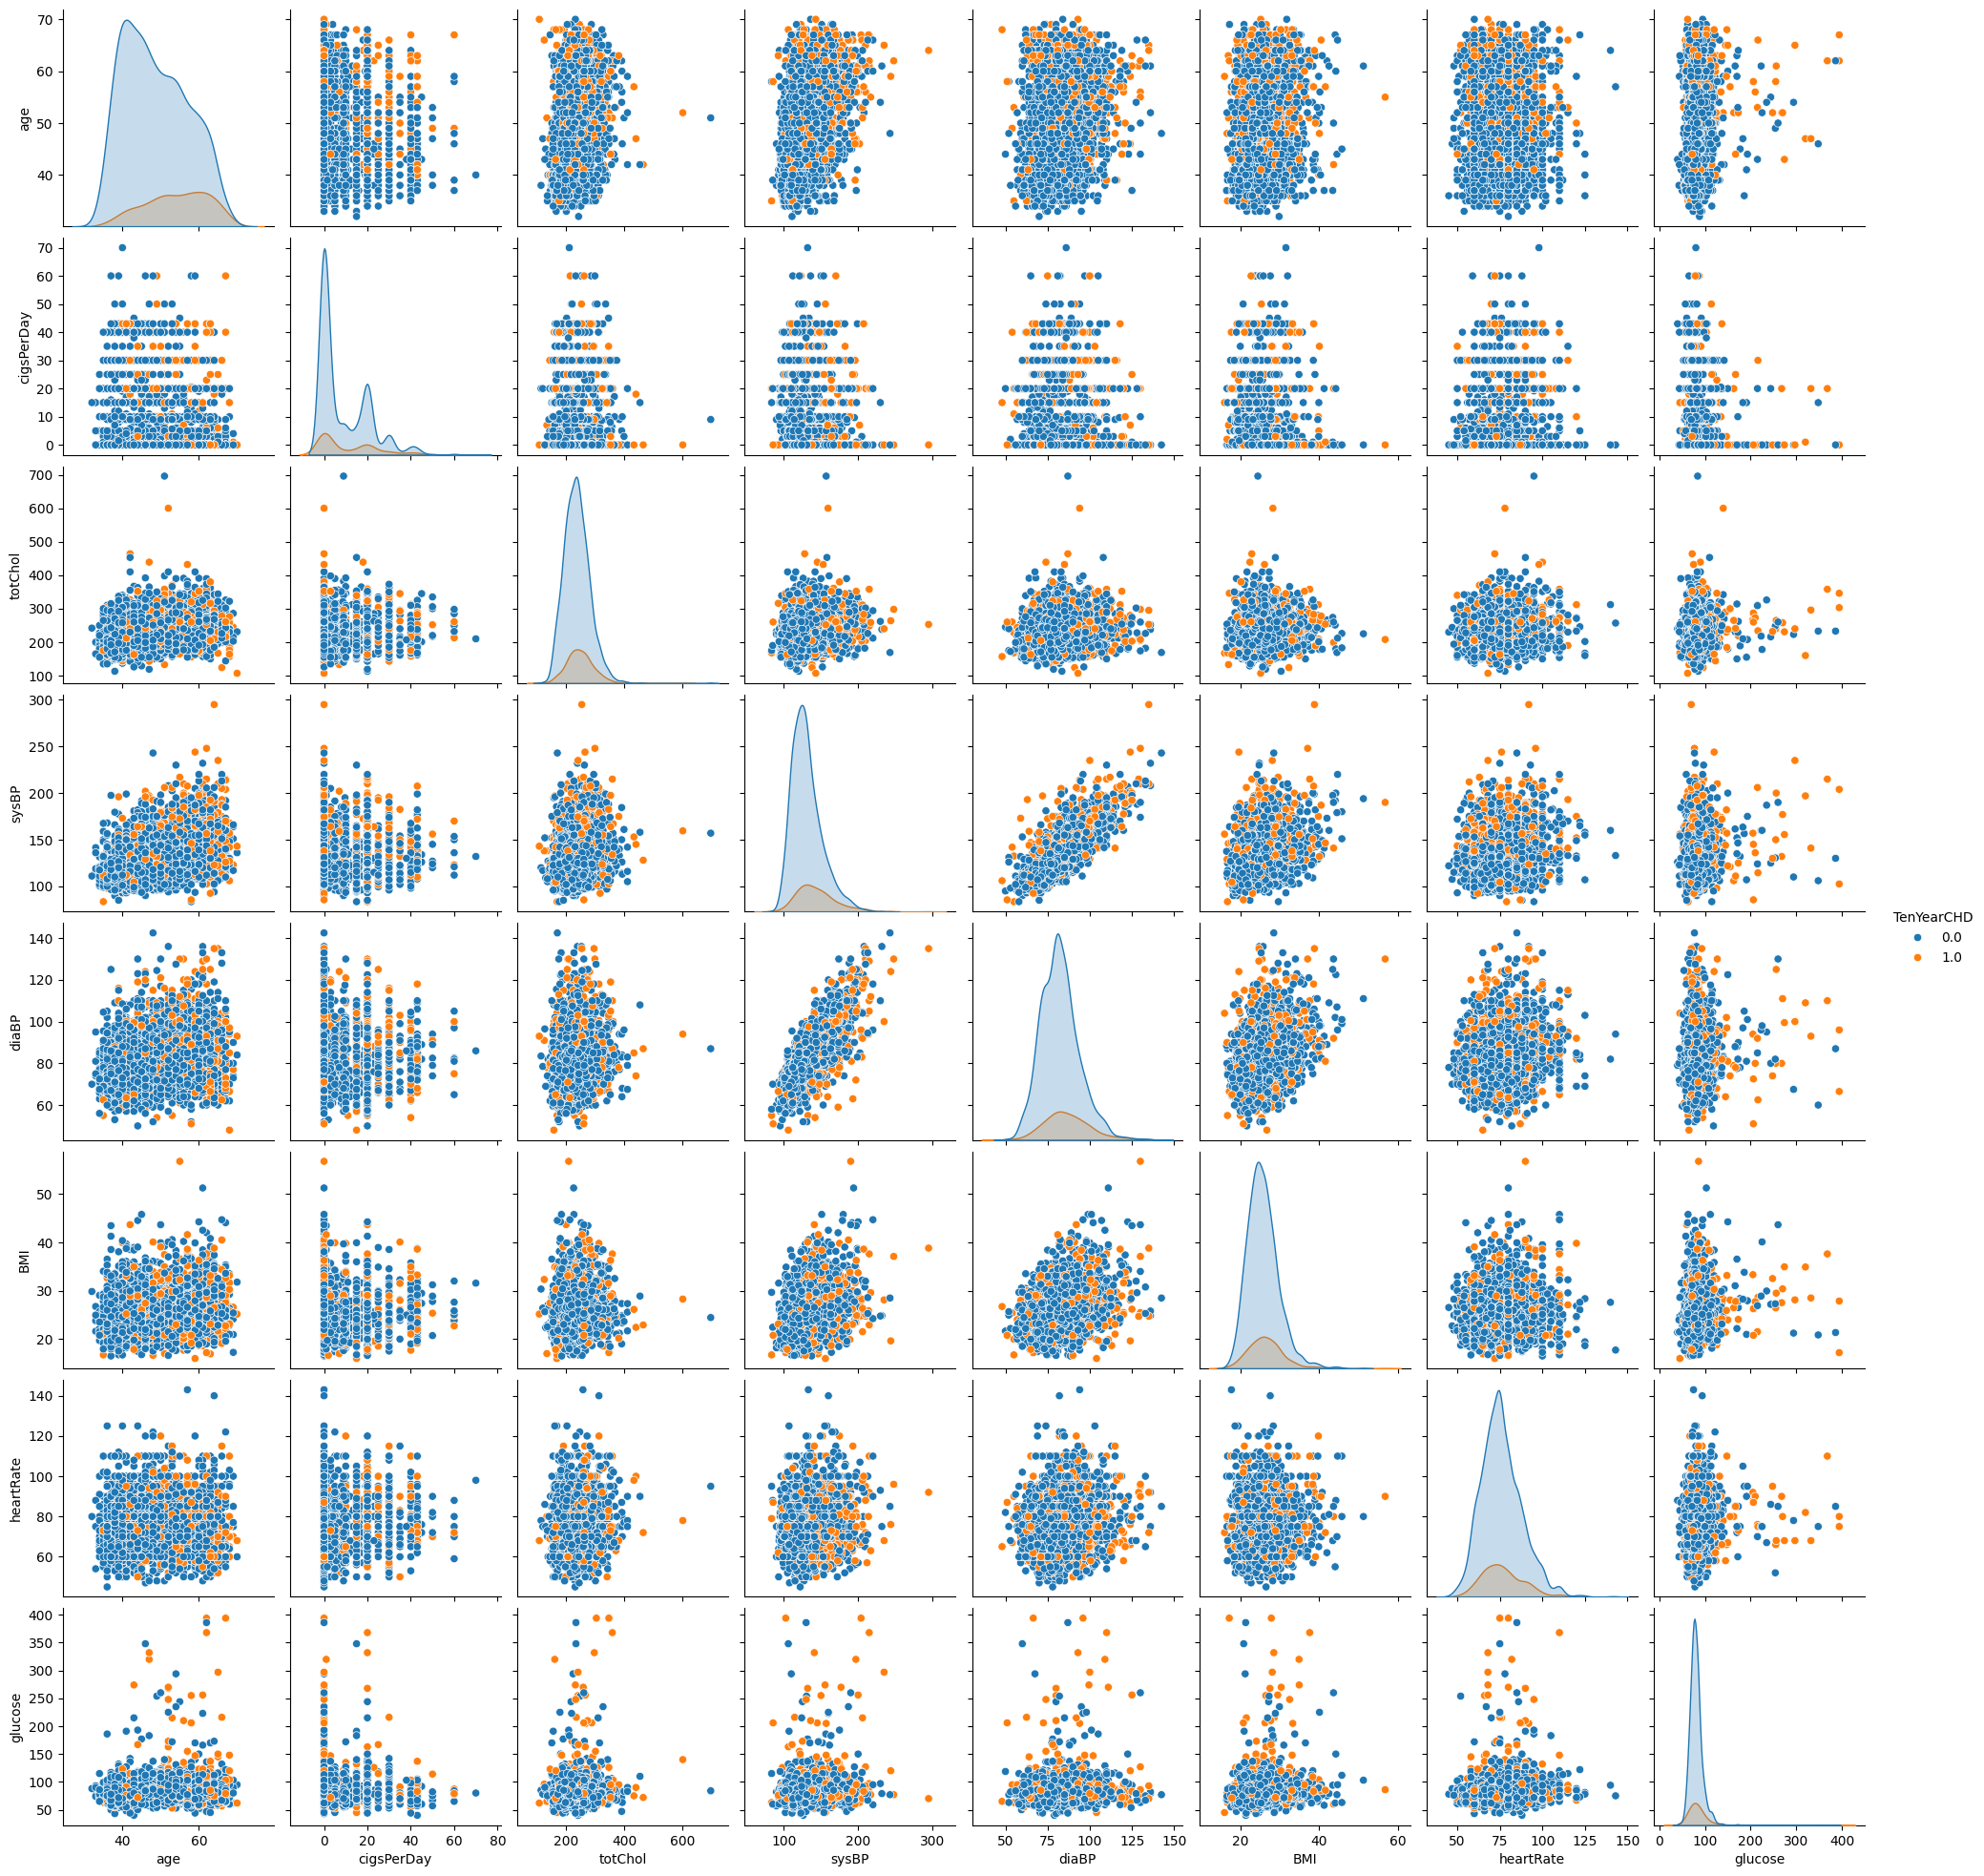

In [103]:
sns.pairplot(df_imputed,hue='TenYearCHD')

In [104]:
def bmi(x):
    if x<18.5:
        return 'underweight'
    elif x>=18.5 and x<25:
        return 'normal'
    elif x>=25 and x<30:
        return 'overweight'
    elif x>=30:
        return 'obese'


df_imputed['BMI']=df_imputed['BMI'].apply(bmi)
df_imputed['BMI'].value_counts()

BMI
normal         1515
overweight     1395
obese           439
underweight      41
Name: count, dtype: int64

In [105]:
def blood_pressure_category(sysBP, diaBP):
    if sysBP < 120 and diaBP < 80:
        return 'normal'
    elif 120 <= sysBP < 135 and diaBP < 85:
        return 'elevated'
    elif sysBP >= 135 or diaBP >= 85:
        return 'hypertension'


df_imputed['Blood_Pressure_Category'] = df_imputed.apply(lambda row: blood_pressure_category(row['sysBP'], row['diaBP']), axis=1)
df_imputed.drop(['sysBP', 'diaBP'],axis=1,inplace=True)

In [106]:
def cole(x):
  if x<200:
    return 'safe'
  elif x>=200 and x<240:
    return 'at_risk'
  elif x>=240:
    return 'dangerous'

df_imputed['totChol']=df_imputed['totChol'].apply(cole)

In [107]:
def glucose(x):
  if x<70:
    return 'low'
  elif x>=70 and x<110:
    return 'normal'
  elif x>=110 and x<180:
    return 'boderline'
  elif x>=180:
    return 'high'

df_imputed['glucose']=df_imputed['glucose'].apply(glucose)

In [108]:
# separate categorical variables from continous
# chnage the datatype of the same
cat_cols1=[]
for i in df_imputed.columns:
    if df_imputed[i].nunique()<11:
        df_imputed[i]=df_imputed[i].astype('category')
        cat_cols1.append(i)

print(cat_cols1)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'glucose', 'TenYearCHD', 'Blood_Pressure_Category']


In [109]:
continuous_cols=list(df_imputed.drop(cat_cols1,axis=1).columns)
print(continuous_cols)

['age', 'cigsPerDay', 'heartRate']


In [110]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      3390 non-null   float64 
 1   education                3390 non-null   category
 2   sex                      3390 non-null   category
 3   is_smoking               3390 non-null   category
 4   cigsPerDay               3390 non-null   float64 
 5   BPMeds                   3390 non-null   category
 6   prevalentStroke          3390 non-null   category
 7   prevalentHyp             3390 non-null   category
 8   diabetes                 3390 non-null   category
 9   totChol                  3390 non-null   category
 10  BMI                      3390 non-null   category
 11  heartRate                3390 non-null   float64 
 12  glucose                  3390 non-null   category
 13  TenYearCHD               3390 non-null   category
 14  Blood_Pr

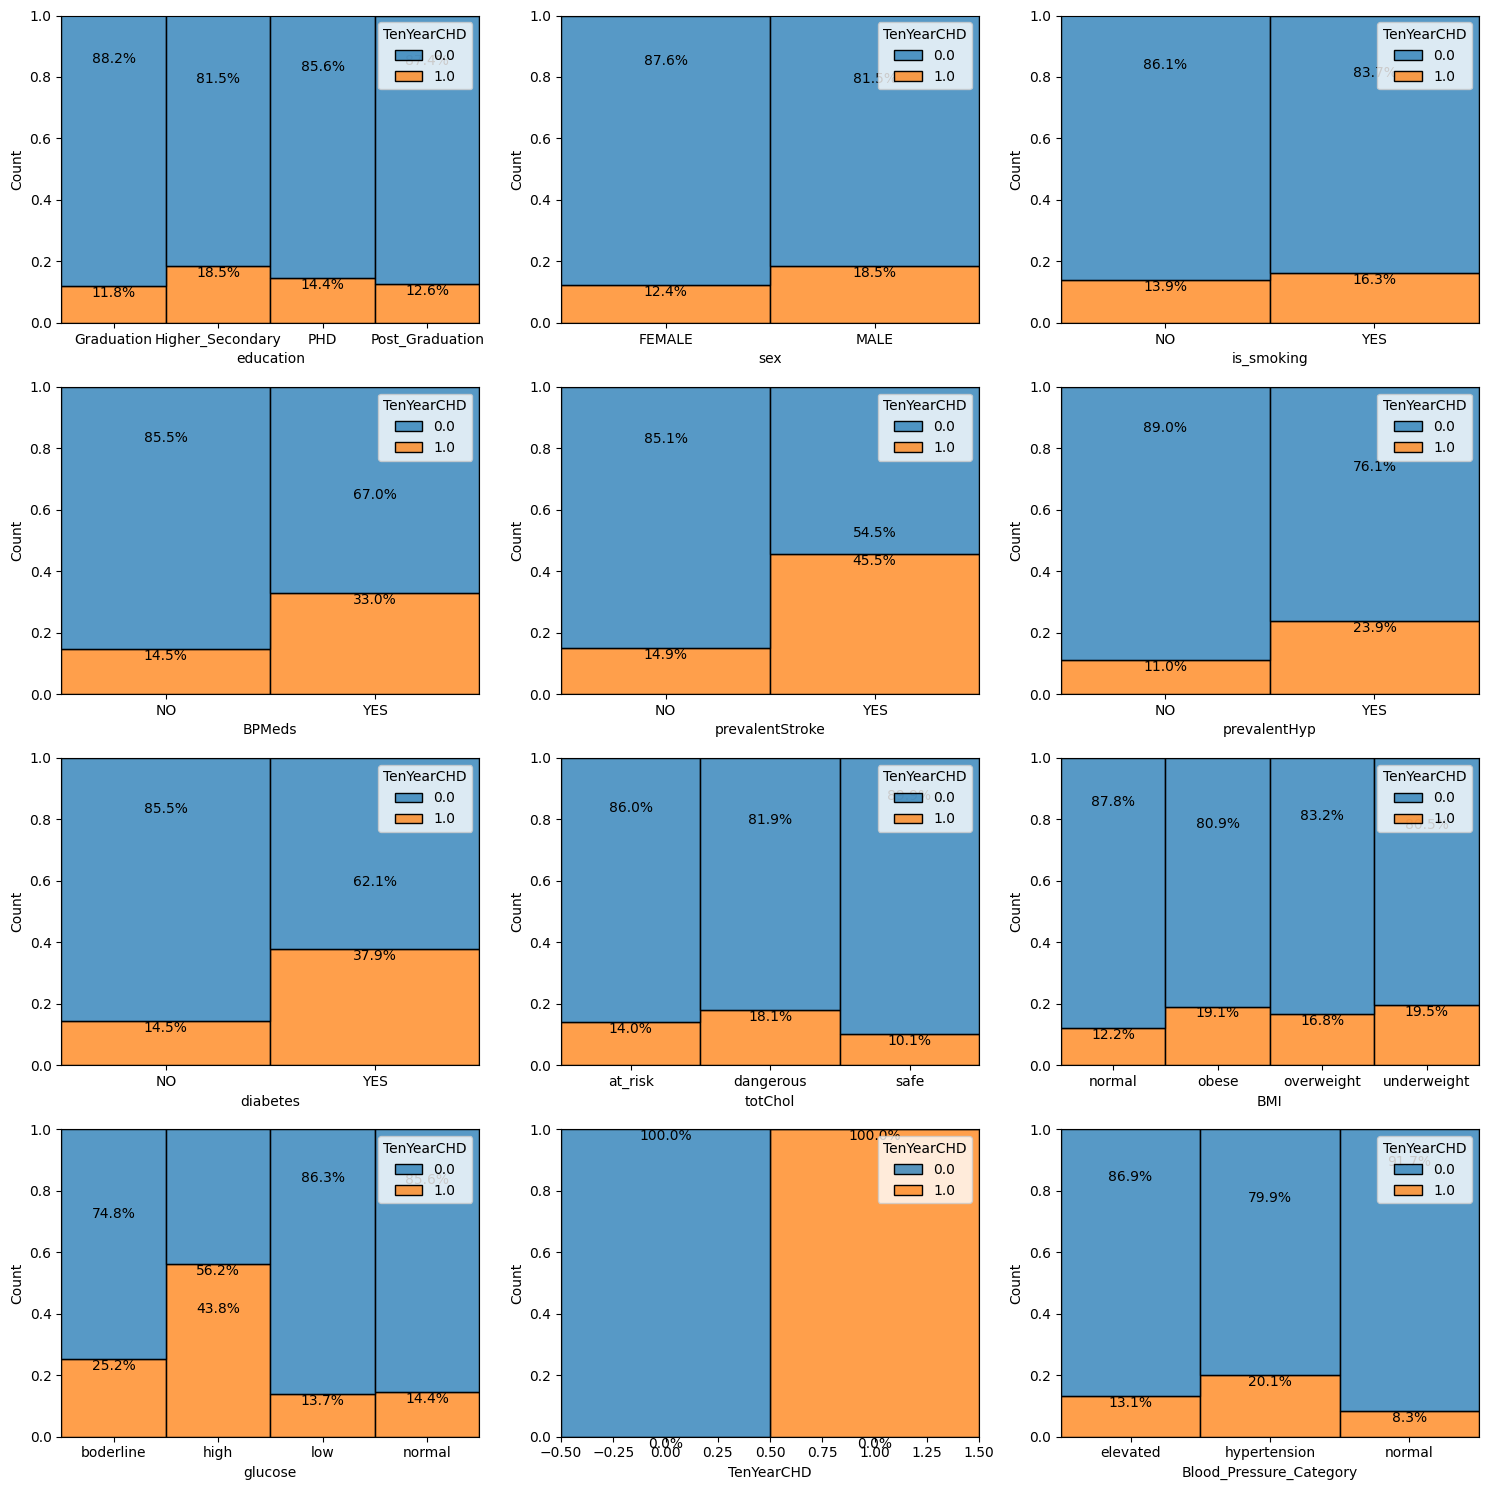

In [111]:
fig,axs=plt.subplots(4,3,figsize=(15,15))

for i,column in enumerate(cat_cols1):
    row=i//3
    col=i%3
    sns.histplot(data=df_imputed,x=column,hue='TenYearCHD',ax=axs[row,col],multiple='fill')
    for p in axs[row,col].patches:
        axs[row,col].annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -5), textcoords='offset points')
plt.tight_layout()
plt.show()

In [112]:
y=df_imputed['TenYearCHD']
x=df_imputed.drop('TenYearCHD',axis=1)

In [113]:
y.value_counts()

TenYearCHD
0.0    2879
1.0     511
Name: count, dtype: int64

In [114]:
x=pd.get_dummies(x)


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score,recall_score
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler,TomekLinks,NearMiss,EditedNearestNeighbours,ClusterCentroids
from imblearn.combine import SMOTEENN

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42,stratify=y)

# **RANDOM FOREST CLASSIFIER**

In [117]:
rfc=RandomForestClassifier(random_state=42,class_weight='balanced')

In [118]:
rfc.fit(x_train,y_train)
y_pred_base = rfc.predict(x_test)
print(classification_report(y_test,y_pred_base))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       432
         1.0       0.33      0.04      0.07        77

    accuracy                           0.84       509
   macro avg       0.59      0.51      0.49       509
weighted avg       0.77      0.84      0.79       509



In [119]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_base).ravel()
(tn, fp, fn, tp)

(426, 6, 74, 3)

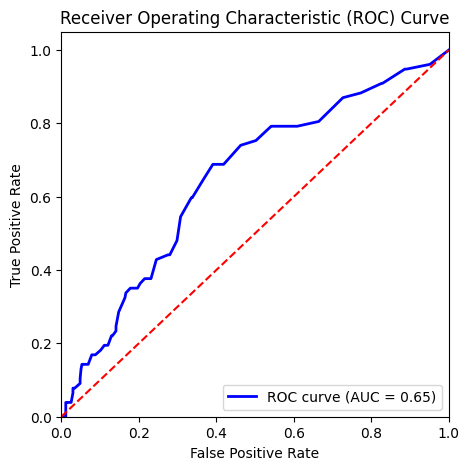

In [120]:
y_pred_proba_base=rfc.predict_proba(x_test)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred_proba contains the predicted probabilities
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_base[:,1])

# Compute AUC score
auc = roc_auc_score(y_test, y_pred_proba_base[:,1])

# Plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**USING UNDER SAMPLING**

In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [122]:
under_sampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)

X_sampled, y_sampled = under_sampler.fit_resample(x_train,y_train)

In [123]:
param_dist_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':['gini','entropy']
}


In [124]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score,recall_score

# this is the custom sccorer
def f1_score_minority(y_true, y_pred):
    return f1_score(y_true, y_pred, pos_label=1)
#this is the scorer object
scorer = make_scorer(f1_score_minority)


rfc = RandomForestClassifier(random_state=42,class_weight='balanced')

rand_search = RandomizedSearchCV(rfc, param_distributions=param_dist_rfc, n_iter=10, cv=5, scoring=scorer)

rand_search.fit(X_sampled,y_sampled)

best_model = rand_search.best_estimator_
best_params = rand_search.best_params_
best_score=rand_search.best_score_

best_model.fit(X_sampled,y_sampled)

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
y_pred3 = best_model.predict(x_test)
y_pred_proba=best_model.predict_proba(x_test)
print(classification_report(y_test,y_pred3))

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'entropy'}
Best Score: 0.6315031035471511
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.78       432
         1.0       0.25      0.60      0.36        77

    accuracy                           0.67       509
   macro avg       0.58      0.64      0.57       509
weighted avg       0.81      0.67      0.72       509



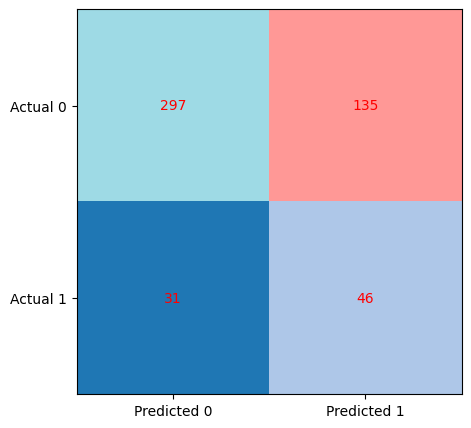

In [125]:
#cunfusion matrix with undersampling
cm= confusion_matrix(y_test,y_pred3)
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

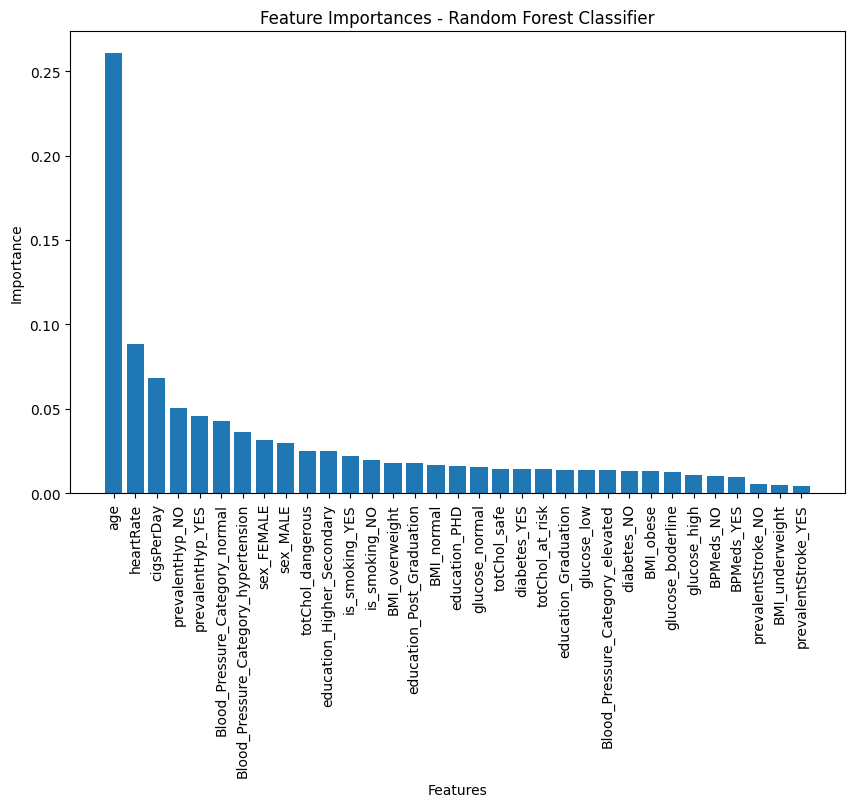

In [126]:
import numpy as np
feature_importances_rfc = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances_rfc)[::-1]
sorted_importances = feature_importances_rfc[sorted_indices]
sorted_columns = x.columns[sorted_indices]


plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_columns)),sorted_columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest Classifier')
plt.show()


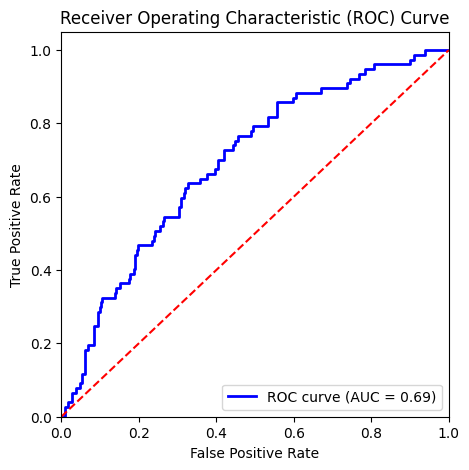

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

auc = roc_auc_score(y_test, y_pred_proba[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **Logistic Regression**

In [128]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}


In [140]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, param_grid_lr, cv=5,scoring=scorer)
grid_search.fit(X_sampled,y_sampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model_lr = grid_search.best_estimator_
best_model_lr.fit(X_sampled,y_sampled)

y_pred_proba = best_model_lr.predict_proba(x_test)
y_pred=(y_pred_proba[:,1]>0.40).astype(int)
print("Best Parameters:", best_params)
print("Best Score:", best_score)


print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.6384736868506502
              precision    recall  f1-score   support

         0.0       0.95      0.13      0.24       432
         1.0       0.17      0.96      0.28        77

    accuracy                           0.26       509
   macro avg       0.56      0.55      0.26       509
weighted avg       0.83      0.26      0.24       509



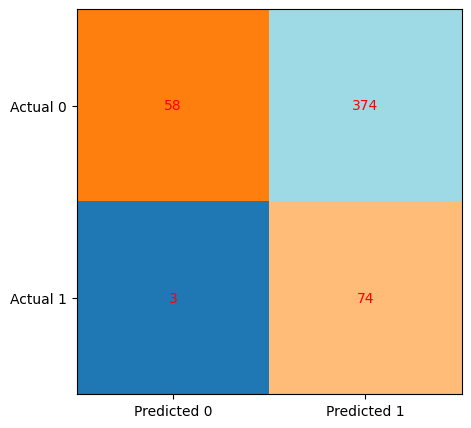

In [130]:
#cunfusion matrix with undersampling
cm= confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

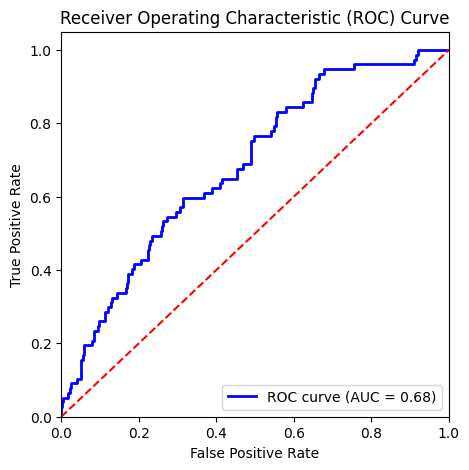

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

auc = roc_auc_score(y_test, y_pred_proba[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


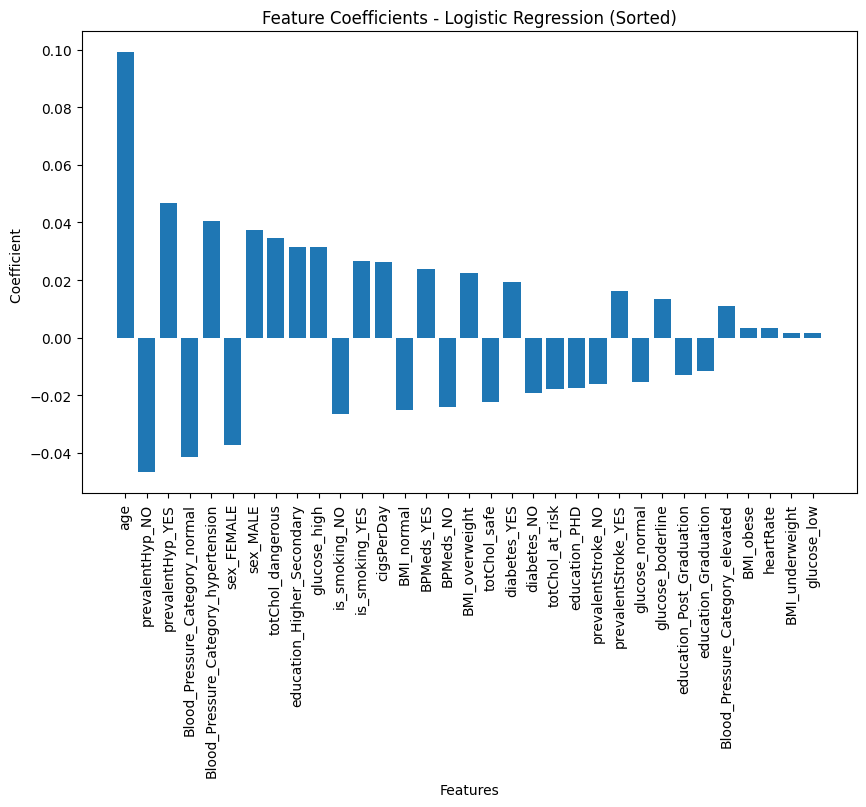

In [132]:
coefficients_log_reg = best_model_lr.coef_[0]

sorted_indices_log_reg = np.argsort(np.abs(coefficients_log_reg))[::-1]
sorted_coefficients_log_reg = coefficients_log_reg[sorted_indices_log_reg]
sorted_columns_log_reg = x.columns[sorted_indices_log_reg]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coefficients_log_reg)), sorted_coefficients_log_reg)
plt.xticks(range(len(sorted_coefficients_log_reg)), sorted_columns_log_reg, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient ')
plt.title('Feature Coefficients - Logistic Regression (Sorted)')
plt.show()

# **SVM**

In [136]:
from sklearn.svm import SVC


param_grid = {
    'C': [1,10, 100],
    'gamma': [0.001, 0.01,0.1],
    'kernel': [ 'rbf']
}

svc_classifier = SVC(probability=True)

grid_search = RandomizedSearchCV(svc_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring=scorer,)
grid_search.fit(X_sampled,y_sampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model_svm = grid_search.best_estimator_
best_model_svm.fit(X_sampled,y_sampled)

y_pred_proba = best_model_svm.predict_proba(x_test)
y_pred=(y_pred_proba[:,1]>0.40).astype(int)
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
Best Score: 0.605553234974686
              precision    recall  f1-score   support

         0.0       0.93      0.59      0.72       432
         1.0       0.24      0.74      0.37        77

    accuracy                           0.61       509
   macro avg       0.59      0.67      0.55       509
weighted avg       0.82      0.61      0.67       509



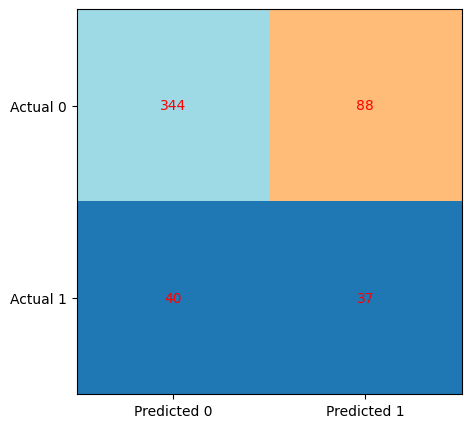

In [134]:
#cunfusion matrix with undersampling
cm= confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm,cmap='tab20')
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0","Predicted 1"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0", "Actual 1"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha = "center",va = "center",color='r')
plt.show()

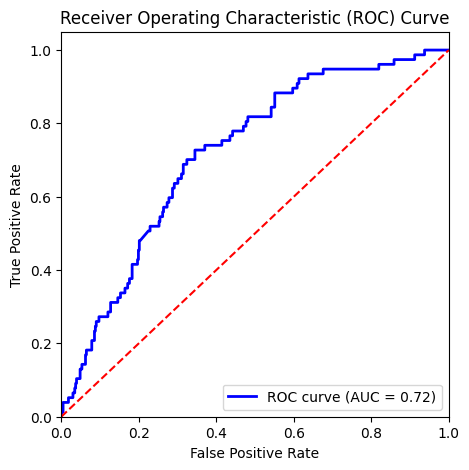

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

auc = roc_auc_score(y_test, y_pred_proba[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
